# Exercise 2.2. Matplotlib

Thank you very much to Dr. Nick Del Grosso for designing this exercise set.

In [2]:
%matplotlib inline

In [3]:
import os
from os import path
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set Paths

In [4]:
data_dir = path.join("matplotlib_data")
try:
    os.makedirs(data_dir)
except OSError as err:
    print(err)

data_filename = 'StroopData.csv'
os.listdir(data_dir)

[Errno 17] File exists: 'matplotlib_data'


['reaction_time.txt',
 'trialnum.txt',
 'stimcolor.txt',
 'respcolor.txt',
 'stimword.txt',
 'subject.txt']

# Load Each Data File into NumPy Arrays

These files are found inside the "Homework 3" Directory:
  - 'subject.txt': subject numbers
  - 'trialnum.txt', trial number for a given session
  - 'stimword.txt', what the stimulus word said (i.e. "YELLOW")
  - 'stimcolor.txt': what color the stimulus was (this is what the subject was asked to report)
  - 'respcolor.txt',: what color the subject reported.  
  - 'reaction_time.txt': response time (msecs)
  
Please use the numpy.loadtxt() function to load these files.  

Note: for files containing strings, you'll need to set the dtype to **str** in the loadtxt function.

In [5]:
filenames = glob(path.join(data_dir, "*txt"))
for filename in filenames:
    try:
        data = np.loadtxt(filename)
    except ValueError:
        data = np.loadtxt(filename, dtype=str)
        
    globals()[path.splitext(path.basename(filename))[0]] = data

subjects = np.loadtxt(path.join(data_dir, 'subject.txt'))
resptime = reaction_time
filenames

['matplotlib_data/reaction_time.txt',
 'matplotlib_data/trialnum.txt',
 'matplotlib_data/stimcolor.txt',
 'matplotlib_data/respcolor.txt',
 'matplotlib_data/stimword.txt',
 'matplotlib_data/subject.txt']

In [6]:
%whos

Variable        Type        Data/Info
-------------------------------------
data            ndarray     2803: 2803 elems, type `float64`, 22424 bytes
data_dir        str         matplotlib_data
data_filename   str         StroopData.csv
err             OSError     [Errno 17] File exists: 'matplotlib_data'
filename        str         matplotlib_data/subject.txt
filenames       list        n=6
glob            function    <function glob at 0x7f6d57f46ed0>
np              module      <module 'numpy' from '/ho<...>ages/numpy/__init__.pyc'>
os              module      <module 'os' from '/home/<...>a2/lib/python2.7/os.pyc'>
path            module      <module 'posixpath' from <...>python2.7/posixpath.pyc'>
pd              module      <module 'pandas' from '/h<...>ges/pandas/__init__.pyc'>
plt             module      <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
reaction_time   ndarray     2803: 2803 elems, type `float64`, 22424 bytes
respcolor       ndarray     2803: 2803 elems, typ

## How Many Trials were there in total across all subjects?

In [7]:
len(subject)

2803

## How Many Unique Subject IDs were there in this study?

In [8]:
len(np.unique(subject))

32

## What is the mean response time, across all subjects and conditions?

np.mean(resptime)

## Max trials any subject did

In [9]:
np.max(trialnum)

90.0

unique subjects = [a, b, ...]
for subj in unique subjects:

{ }

In [11]:
subjects

array([156772., 156772., 156772., ..., 156879., 156879., 156879.])

## Plot a histogram of the response times
(Don't forget to make sure that **%matplotlib inline** has been run already in this notebook, or the plot may not show up!)

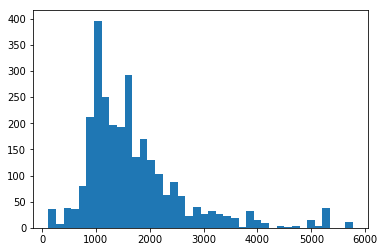

In [12]:
_ = plt.hist(resptime, bins=40)

## Transform the Response Times

You should see that the responses are not normally distributed (if you can't see this, try using a higher number of **bins** in your histogram function).  While this isn't really a problem, it's very convenient when you have normally-distributed data.  Let's try transforming it to get something a bit nicer for statistical analysis...

  - Make a new response time array that is the **log** of the response times.  
  - Plot a new histogram!

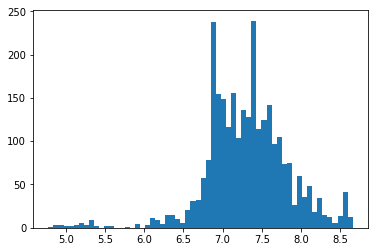

In [13]:
log_rt = np.log(resptime)
_ = plt.hist(log_rt, bins=60)

## Reject Bad Data

Now, that's a little nicer!  But wait... there's are some trials that seem to be **outliers** (data points that someone decides aren't representative of the data set): those with **log response times less than 5.7**.  After much consideration and deliberation with my supervisor, I've decided to remove those trials from my whole analysis.

Let's do this in a few steps:

### Select the the trials that we want to **Keep** (Not the outliers)
(Hint: You will be making a boolean array here)

In [14]:
good_RTs = log_rt > 5.7
good_RTs

array([ True,  True,  True, ...,  True,  True,  True])

### Use Logical Indexing to get the response times from those trials into a new array, effectively removing the bad response times.
plot the histogram of the new log response time array to be sure those trials are gone.

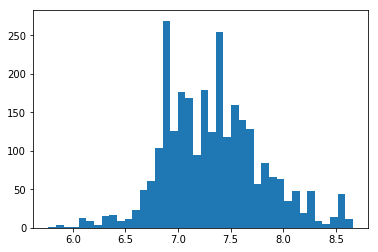

In [15]:
log_rt_f = log_rt[good_RTs]
_ = plt.hist(log_rt_f, bins=40)

### Remove the bad trials from all of your other arrays, too.
**Important:** Confirm that all of your arrays have the same length after filtering before moving on, so you can be sure that each index corresponds to the same trial!

**Important:** It may be wise not to overwrite your old variable names.  While not a problem in principle, it can lead to issues when you try to re-run the same cell of code.

In [16]:
subjf = subject[good_RTs]
stimwordf = stimword[good_RTs]
trialnumf = trialnum[good_RTs]
stimcolorf = stimcolor[good_RTs]
respcolorf = respcolor[good_RTs]

len(stimcolorf)

2766

### From here on, use the Rejected data!

## Overall, what was the accuracy of the responses? 
  - How many trials in total were correct (stimcolor matched respcolor), 
  - how many were incorrect, and 
  - what percent accuracy was there, overall?

In [17]:
np.sum(respcolorf == stimcolorf)

2684

In [18]:
np.sum(respcolor != stimcolor)

108

In [19]:
np.mean(respcolor == stimcolor)

0.9614698537281484

## Matched vs Unmatched Colors: 

  - What was the mean log response time for Congruent trials (the stimulus word and color matched each other)?  
  - What was the mean log response time for Incongruent trials (when they did not match)?

In [20]:
isMatch = stimcolorf == stimwordf
matchRT = log_rt_f[isMatch]
nonmatchRT = log_rt_f[isMatch == False]

np.mean(matchRT)

7.05608675128054

In [21]:
np.mean(nonmatchRT)

7.62702820539089

## Make a Bar Graph of Log Response Time
The bar graph should show Mean Log Response Times for the Congruent and Incongruent conditions, with Standard-Deviation Error Bars.  Put text labels on the x access showing which bars go with which condition.

For help and an example, take a look at http://matplotlib.org/examples/api/barchart_demo.html

Text(0,0.5,'Log Reaction Time')

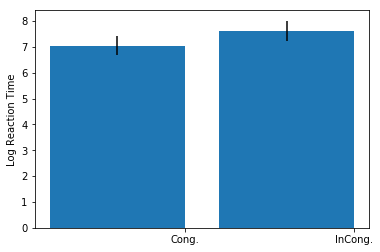

In [22]:
fig, ax = plt.subplots()

ax.bar([0, 1], [np.mean(matchRT), np.mean(nonmatchRT)], 
       yerr= [np.std(matchRT), np.std(nonmatchRT)])
ax.set_xticks([0.4, 1.4])
ax.set_xticklabels(['Cong.', 'InCong.'])
ax.set_ylabel('Log Reaction Time')

# Make a Bar Graph of Response Time

The logged data doesn't make a very good impression of just how big an effect this is, sadly.  Let's un-log it by taking the **exponent** (numpy.exp) of the logged response time data, and plot that bar graph to get the data in milliseconds!

Text(0,0.5,'Reaction Time')

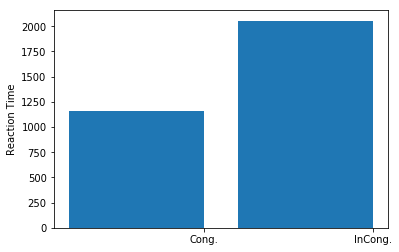

In [23]:
fig, ax = plt.subplots()

ax.bar([0, 1], [np.exp(np.mean(matchRT)), np.exp(np.mean(nonmatchRT))], 
       yerr= [np.exp(np.std(matchRT)), np.exp(np.std(nonmatchRT))])
ax.set_xticks([0.4, 1.4])
ax.set_xticklabels(['Cong.', 'InCong.'])
ax.set_ylabel('Reaction Time')

# Change in Performance over Time

In experiments like this, we assume that each trial is independent of each other.  Often, this isn't the case, and not taking that into account can sometimes lead to some wrong conclusions.  Let's see what we can find...

### How did reaction time change over the course of each subject's session? 

Were earlier trials faster or slower than later trials in a session, overall?  Make a scatter plot of the response times over the course of a session!

Text(0,0.5,'Log Response Time')

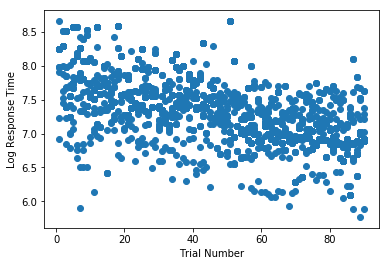

In [24]:
plt.scatter(trialnumf, log_rt_f)
plt.xlabel('Trial Number')
plt.ylabel('Log Response Time')

### What about between each subject?  Do all subjects show this difference in response time between the Congruent and Incogruent conditions, or is this just coming from a few subjects?

Make two arrays, one for each condition, which contains the mean log reaction times for each subject for that condition.

In [25]:
con_mean = {}
inc_mean = {}
subject_u = set(subject)
for subj in subject_u:
    subj_rt_con = log_rt_f[(subjf == subj) & (stimwordf == stimcolorf)]
    subj_rt_inc = log_rt_f[(subjf == subj) & (stimwordf != stimcolorf)]
    con_mean[subj] = np.mean(subj_rt_con)
    inc_mean[subj] = np.mean(subj_rt_inc)
    
con_mean = np.array(list(con_mean.values()))
inc_mean = np.array(list(inc_mean.values()))

In [26]:
con_mean

array([6.45597264, 6.87165351, 6.89737659, 6.89737659, 6.89737659,
       7.41806563, 7.41806563, 6.89737659, 7.41806563, 6.97514285,
       6.97514285, 6.97514285, 6.97514285, 7.19351561, 6.97514285,
       6.97514285, 6.97514285, 7.46669654, 6.97514285, 6.97514285,
       7.11052059, 7.11052059, 7.11052059, 7.11052059, 7.11052059,
       7.11052059, 7.11052059, 7.11052059, 7.11052059, 7.11052059,
       7.11052059, 6.97116271])

Plot a histogram of the difference in mean log reaction times between conditions for each subject!

Text(0,0.5,'Freq')

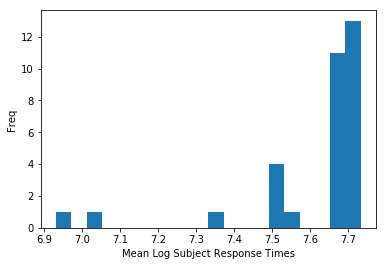

In [27]:
_ = plt.hist(inc_mean, bins=20)
plt.xlabel('Mean Log Subject Response Times')
plt.ylabel('Freq')

What do you think, should anyone be rejected?  

## Participant Response Speed vs. Size of Stroop Effect

Make a scatter plot showing the relationship between how quickly subjects responded for congruent and incongruent stimuli!

Text(0,0.5,'Mean Log RT for Incongruent Stimuli')

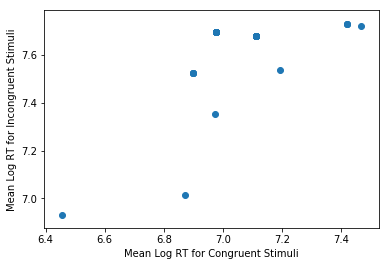

In [28]:
fig, ax = plt.subplots()
ax.scatter(con_mean, inc_mean)
ax.set_xlabel('Mean Log RT for Congruent Stimuli')
ax.set_ylabel('Mean Log RT for Incongruent Stimuli')

That's an interesting effect, don't you think? Anyway, I think that's enough analysis.  Let's publish that last figure and move on!

## Save Figure to File

Save the figure using **fig.savefig()** to your data directory as a png file!  Great job!

In [29]:
fig.savefig(path.join(data_dir, 'corrfig.png'))